# Simulation

- In this lesson, we will work through several examples of using random numbers to simulate real-world scenarios.
- For reference, the [viz module](./viz.py) contains the visuals used for these lessons.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import viz # curriculum example visualizations

np.random.seed(29)

## Generating Random Numbers with Numpy

The `numpy.random` module provides a number of functions for generating random numbers.

- `np.random.choice`: selects random options from a list
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.random`: generates numbers between 0 and 1
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

In [2]:
# flip a coin 4 times
np.random.choice(['tail','head'], size = 4)

array(['head', 'head', 'tail', 'head'], dtype='<U4')

In [3]:
# flip two coins 5 times
np.random.choice(['tail','head'], size = (5,2))

array([['tail', 'tail'],
       ['tail', 'head'],
       ['head', 'tail'],
       ['head', 'head'],
       ['head', 'tail']], dtype='<U4')

In [4]:
np.random.uniform(1,6)

5.24452553807411

In [5]:
np.random.uniform(1,6, size = 10)

array([4.84099989, 4.66571862, 2.20993212, 4.60154346, 1.29188653,
       3.04834463, 4.05336137, 2.27957437, 2.42835964, 4.42231873])

(array([110.,  86., 103.,  91.,  89., 101., 105., 109., 105., 101.]),
 array([1.00038591, 1.50027608, 2.00016625, 2.50005641, 2.99994658,
        3.49983674, 3.99972691, 4.49961708, 4.99950724, 5.49939741,
        5.99928758]),
 <BarContainer object of 10 artists>)

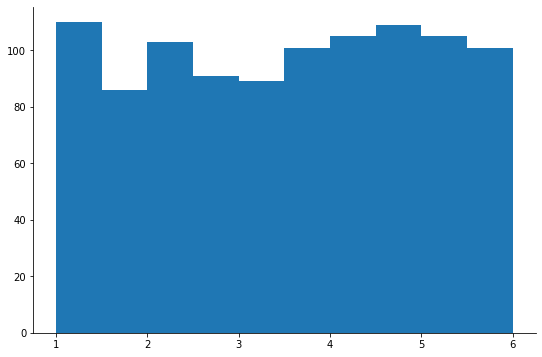

In [10]:
plt.hist(np.random.uniform(1,6, size = 1000))

(array([10012.,  9940.,  9939., 10087.,  9911., 10101.,  9986.,  9990.,
         9863., 10171.]),
 array([1.00001644, 1.50000681, 1.99999717, 2.49998754, 2.99997791,
        3.49996827, 3.99995864, 4.49994901, 4.99993937, 5.49992974,
        5.9999201 ]),
 <BarContainer object of 10 artists>)

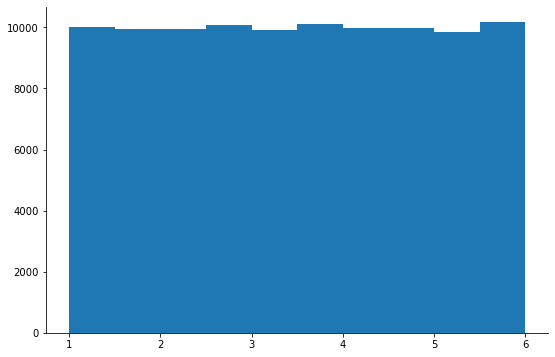

In [11]:
plt.hist(np.random.uniform(1,6, size = 100000))

In [12]:
np.random.random()

0.1916938655072411

In [13]:
# 10 random numbers between 0 and 1
np.random.random(size = 10)

array([0.65602166, 0.42054771, 0.53182672, 0.8335821 , 0.24669513,
       0.43839334, 0.46243361, 0.40943017, 0.78678788, 0.18344559])

## Example Problems

### Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

One way we can keep track of all the simulations is to use a 2-dimensional matrix. We can create a matrix where each row represents one "trial". Each row will have 3 columns, representing the 3 dice rolls.

In [14]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = (n_trials, n_dice))
rolls

array([[1, 4, 5],
       [6, 4, 1],
       [2, 2, 2],
       ...,
       [1, 2, 3],
       [4, 6, 4],
       [3, 2, 1]])

Here we used the `choice` function to randomly select an element out of the list of the number 1-6, effectively simulating a dice roll. The second argument supplied to `choice` is the total number of dice to roll. 

Now that we have all of the simulated dice rolls, we want to get the sum of the dice rolls for each trial. To do this, we can use the `.sum` function and specify that we want the sum of every row (as opposed to the sum of all the numbers, or the sum by column) with the `axis` key word argument.

In [16]:
rolls.sum(axis = 1)

array([10, 11,  6, ...,  6, 14,  6])

In [17]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([10, 11,  6, ...,  6, 14,  6])

Let's pause here for a minute and visualize the data we have:

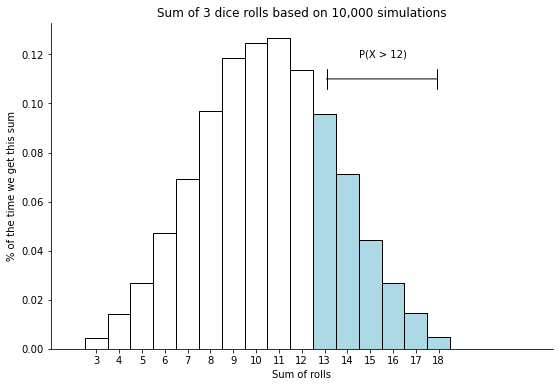

In [18]:
viz.simulation_example1(sums_by_trial)

The area shaded in lightblue represents our chance of winning, that is, the number of times that the sum of 3 dice rolls is greater than 12.

We can now convert each value in our array to a boolean value indicating whether or not we won:

In [20]:
sums_by_trial > 12

array([False, False, False, ..., False,  True, False])

In [19]:
wins = sums_by_trial > 12
wins

array([False, False, False, ..., False,  True, False])

To calculate an overall win rate, we can treat each win as a `1` and each loss as `0`, then take the average of the array:

In [23]:
# quick example
np.array([True, False, True, True]).mean()

0.75

In [24]:
win_rate = wins.mean()
win_rate

0.2572

Now that we know our win rate, we can calculate the expected profit:

In [25]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

-1.1420000000000003

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

To answer the last part of the question, we can recalculate our win rate based on the sums being greater than or equal to 12:

In [26]:
wins = sums_by_trial >= 12
wins

array([False, False, False, ..., False,  True, False])

In [28]:
win_rate = wins.mean()
win_rate

0.3709

In [29]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5635000000000003

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 58 cents.

### No Rest or Relaxation

> There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

Let's first do a little bit of setup:

In [30]:
p_nap = .3
ndays = ncols = 2
n_simulated_weekends = nrows = 10**5

To simulate the results from many weekends, we'll create a 2 x 10,000 matrix, with 2 being the number of days in a weekend and 10,000 being the number of simulations we want to run.

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [31]:
data = np.random.random(size =(nrows, ncols))
data

array([[0.76994856, 0.3697846 ],
       [0.03944608, 0.61518513],
       [0.8231294 , 0.27743801],
       ...,
       [0.37685299, 0.00895032],
       [0.92829955, 0.51303963],
       [0.99205034, 0.58511196]])

In [32]:
naps = data < p_nap
naps

array([[False, False],
       [ True, False],
       [False,  True],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat `True` as 1 and `False` as 0.

In [33]:
naps.sum(axis=1)

array([0, 1, 1, ..., 1, 0, 0])

Now we have the results of our simulation, an array where each number in the array represents how many naps were taken in a two day weekend.

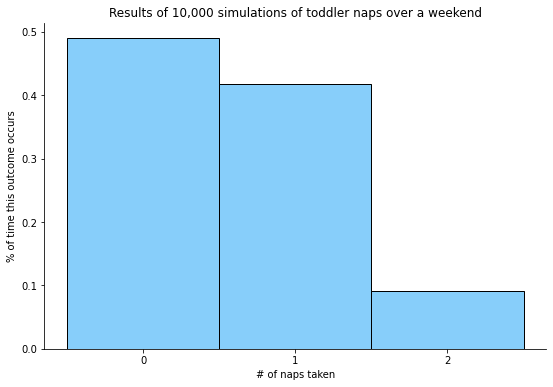

In [34]:
viz.simulation_example2(naps)

We can use this to answer our original questions, what is the probability that at least one nap is taken?

In [37]:
naps.sum(axis=1)

array([0, 1, 1, ..., 1, 0, 0])

In [36]:
naps.sum(axis=1) >= 1

array([False,  True,  True, ...,  True, False, False])

In [38]:
(naps.sum(axis=1) >= 1).mean()

0.50992

What is the probability no naps are taken?

In [39]:
(naps.sum(axis=1) == 0).mean()

0.49008

### One With Dataframes

Let's take a look at one more problem:

> What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

In [40]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = (nrows, ncols))
rolls

array([[1, 4, 6],
       [1, 1, 1],
       [2, 3, 6],
       ...,
       [3, 4, 5],
       [1, 6, 1],
       [5, 6, 6]])

In [43]:
pd.DataFrame(rolls)

,0,1,2
0,1,4,6
1,1,1,1
2,2,3,6
3,5,3,3
4,1,3,4
...,...,...,...
99995,1,6,6
99996,2,5,3
99997,3,4,5
99998,1,6,1


In [42]:
pd.DataFrame(rolls).iloc[0]

0    1
1    4
2    6
Name: 0, dtype: int64

In [44]:
pd.DataFrame(rolls).iloc[0].values

array([1, 4, 6])

In [45]:
3 in pd.DataFrame(rolls).iloc[0].values

False

In [47]:
pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis = 1)

0        False
1        False
2         True
3         True
4         True
         ...  
99995    False
99996     True
99997     True
99998    False
99999    False
Length: 100000, dtype: bool

In [46]:
(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())

0.41885

Let's break down what's going on here:

1. First we assign values for the number of rows and columns we are going to use
1. Next we create the `rolls` variable that holds a 3 x 10,000 matrix where each element is a randomly chosen number from 1 to 6
1. Lastly we create a dataframe from the rolls
    1. `pd.DataFrame(rolls)` converts our 2d numpy matrix to a pandas DataFrame
    1. `.apply(...` applies a function to each **row** in our dataframe, because we specified `axis=1`, the function will be called with each row as it's argument. The body of the function checks to see if the value `3` is in the values of the row, and will return either `True` or `False`
    1. `.mean()` takes our resulting series of boolean values, and treats `True` as 1 and `False` as 0, to give us the average rate of `True`s, in this case, the simulated probability of getting a 3 in 3 dice rolls.